## Do countries with low initial levels of capital grow faster than and catch up with countries that start off with high levels of capital?

 ## Motivation
 
 
 



 

## Method




In [19]:
"""
Filename: solow.py
Reference: http://quant-econ.net/py/python_oop.html
"""
from __future__ import division  # Omit for Python 3.x
import numpy as np

class Solow:
    r"""
    Implements the Solow growth model with update rule

    .. math::
        k_{t+1} = \frac{s z k^{\alpha}_t}{1 + n}  + k_t \frac{1 + d}{1 + n}
    
    """

    def __init__(self, n, s, d, alpha, z, k):
        """ 
        Solow growth model with Cobb Douglas production function.  All
        parameters are scalars.  See http://quant-econ.net/py/python_oop.html
        for interpretation.
        """
        self.n, self.s, self.d, self.alpha, self.z = n, s, d, alpha, z
        self.k = k
        

    def h(self,x):
        "Evaluate the h function"
        temp = self.s * self.z * self.k**self.alpha + self.k * (1 - self.d)
        return temp / (1 + self.n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h(self.k)
        
    def steady_state(self):
         "Compute the steady state value of capital."
         return ((self.s * self.z) / (self.n + self.d))**(1 / (1 - self.alpha))
     
    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path


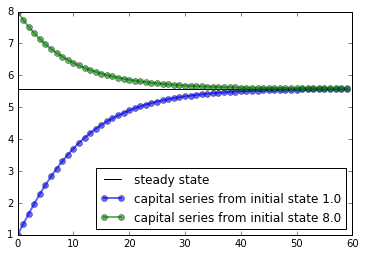

In [20]:
import matplotlib.pyplot as plt
baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0
s1 = Solow(*baseline_params)  # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)
s2.k = 8.0  # Reset s2.k to make high capital economy
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend(loc='lower right')
plt.show()

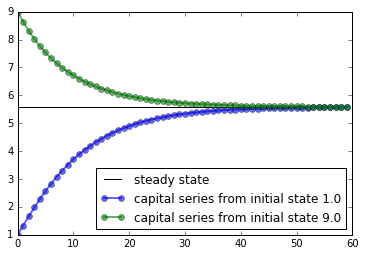

In [24]:
import matplotlib.pyplot as plt
baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0
s1 = Solow(*baseline_params)  # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)
s2.k = 9.0  # Reset s2.k to make high capital economy
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend(loc='lower right')
plt.show()

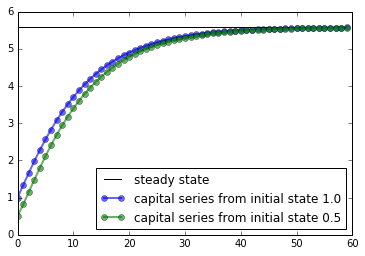

In [25]:
import matplotlib.pyplot as plt
baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0
s1 = Solow(*baseline_params)  # The 'splat' operator * breaks up the tuple
s2 = Solow(*baseline_params)
s2.k = 0.5  # Reset s2.k to make high capital economy
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = 'capital series from initial state {}'.format(s.k)
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend(loc='lower right')
plt.show()

## Conclusion